This Jupyter Notebook demonstrates how to: 
 * Upload a .csv file
 * Create a dataframe
 * Calculate new columns of data
 * Plot(x,y) data in a scatter plot
 * Perform Ordinary Least Squares lineaer regression to find a best fit line to the data
 * Plot the best fit line
 * Predict a y-value, given an x-value, based on the best fit line
 
Load the following libraries and packages:
 * Pandas
 * Numpy
 * Scikit-Learn
 * matplotlib
 * plotly
 * hublib

In [1]:
# Load the Python libraries you will need here we will load Pandas (data tables), Numpy (math),SciPy (stats), Matplotlib (plotting) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hublib.ui import FileUpload
import plotly 
import plotly.graph_objs as go # This is the graphical object (Think "plt" in Matplotlib if you have used that before
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from plotly.offline import iplot # These lines are necessary to run Plotly in Jupyter Notebooks, but not in a dedicated environment
plotly.offline.init_notebook_mode(connected=True)

<IPython.core.display.Javascript object>

Use this hublib library function to upload a csv file from you local computer.

In [2]:
f = FileUpload("Upload a .csv file with the data you wish to analyze.", 
               "This is a description that appears when the mouse hovers over the name.",
               dir='.',
               maxsize='10M')
f

In [4]:
dataframe1=pd.read_csv('abs_vs_t.csv')
dataframe1

,t,abs
0,0,0.7290
1,275,0.6450
2,550,0.5190
3,825,0.4710
4,1100,0.4120
5,1375,0.3520
6,1650,0.3040
7,1925,0.2590
8,2200,0.2200
9,2475,0.1810


We have created a Pandas dataframe (called dataframe1) from the .csv file.  A dataframe is a 2D representation of the data, that can be displayed in a table.  The column names for this dataframe are t and abs.

For this lab, we want to compare the shapes of three plots to see which is the most linear:
- absorption vs time
- inverse absorption vs time
- ln(absorption) vs time

We will do some math to create two more columns in the dataframe with the values for ln(absorption) and inverse absorption (1/absorption). The new columns will be named ln_abs and inv_abs.

np.log(dataframe1["abs"]) uses the natural log function in numpy to take the natural log of each element in the abs column.
The assignment 
dataframe1['ln_abs']= .... puts the stuff on the right hand side into the new column ln_abs that we are creating in the dataframe. 
Here is how we implement these two pieces together:

In [5]:
dataframe1['ln_abs']=np.log(dataframe1["abs"]) # calculate and create a new column
dataframe1 # display dataframe1

,t,abs,ln_abs
0,0,0.7290,-0.316082
1,275,0.6450,-0.438505
2,550,0.5190,-0.655851
3,825,0.4710,-0.752897
4,1100,0.4120,-0.886732
5,1375,0.3520,-1.044124
6,1650,0.3040,-1.190728
7,1925,0.2590,-1.350927
8,2200,0.2200,-1.514128
9,2475,0.1810,-1.709258


In [6]:
dataframe1['inv_abs']=1/(dataframe1["abs"])
dataframe1

,t,abs,ln_abs,inv_abs
0,0,0.7290,-0.316082,1.371742
1,275,0.6450,-0.438505,1.550388
2,550,0.5190,-0.655851,1.926782
3,825,0.4710,-0.752897,2.123142
4,1100,0.4120,-0.886732,2.427184
5,1375,0.3520,-1.044124,2.840909
6,1650,0.3040,-1.190728,3.289474
7,1925,0.2590,-1.350927,3.861004
8,2200,0.2200,-1.514128,4.545455
9,2475,0.1810,-1.709258,5.524862


Now the dataframe contains all of the data we need.  

# Plotting Data with dataframe.plot - based on matplotlib

It only remains to plot the three graphs. There is a simple plotting functionality in pandas dataframes - using .plot

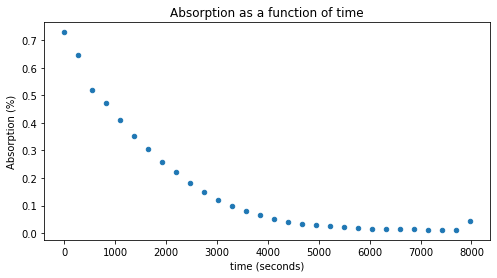

In [7]:
dataframe1.plot(x ='t', y='abs', kind = 'scatter', figsize = (8,4))
plt.title("Absorption as a function of time")
plt.xlabel('time (seconds)')
plt.ylabel('Absorption (%)')
plt.show()

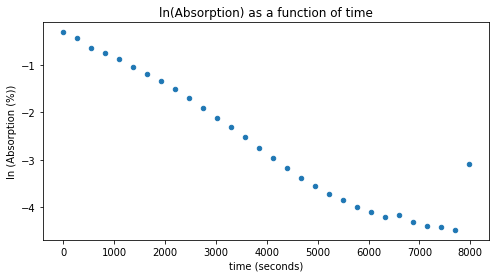

In [8]:
dataframe1.plot(x ='t', y='ln_abs', kind = 'scatter', figsize = (8,4))
plt.title("ln(Absorption) as a function of time")
plt.xlabel('time (seconds)')
plt.ylabel('ln (Absorption (%))')
plt.show()

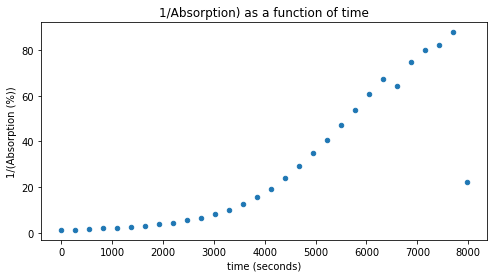

In [9]:
dataframe1.plot(x ='t', y='inv_abs', kind = 'scatter', figsize = (8,4))
plt.title("1/Absorption) as a function of time")
plt.xlabel('time (seconds)')
plt.ylabel('1/(Absorption (%))')
plt.show()

# Plotting Data with plotly

We can also plot this data using plotly, which creates plots with more features.
You can read more about plotly graph objects here: https://plot.ly/

To prepare the data to be plotted, we want a columnn for the x data and a column for the y data. We will create one new variable for each of the columns we want to graph.  Name these variables time, Abs, ln_Abs and inv_Abs.

Each column in the data frame can be specified by its column name, and the following command assigns each column to one of the new variables.

In [10]:
time = dataframe1["t"]
Abs = dataframe1["abs"]
ln_Abs = dataframe1["ln_abs"]
inv_Abs = dataframe1["inv_abs"]

To plot data using plotly, we need to specify a trace and a layout.  
The trace contains:
- the x and y data we want to visualize 
- the type of plot, called the "mode".
    - to get a scatter plot we set the mode to 'markers' 

In [11]:
trace1 = go.Scatter(x = time, y = Abs, mode = 'markers')

The layout contains:
- The graph title
- The x-axis title
- The y-axis title

In [12]:
layout1 = go.Layout(title = "Absorption vs. time",
                    xaxis= dict(title= 'Time (seconds)'),
                    yaxis= dict(title= 'Absorption (%)'))

Now plot the data:

In [13]:
fig1 = go.Figure(trace1,layout1)
iplot(fig1)

There are some nice features of this plot:
 * if you resize the Jupyter notebook window, this plot also resizes.
 * If you put the cursor near a data point, it displays the coordinates.
 * There is a menu of functions above the plot (put your cursor in the graph or at the top of the cell to see it) that allow you to
     * download the figure as a .png file
     * zoom in or out; rescale; autoscale
     * pan
     * box or lasso select areas

Now we will plot the data.  First, plot Absorption vs time

In [14]:
layout2 = go.Layout(title = "ln(Absorption) vs time",
                    xaxis= dict(title= 'Time (seconds)'),
                    yaxis= dict(title= 'ln(Absorption (%))'))

In [15]:
trace2 = go.Scatter(x = time, y = ln_Abs, mode = 'markers')

In [16]:
fig2 = go.Figure(trace2, layout2)
iplot(fig2)

Next, plot 1/Abs vs time.  

In [17]:
layout3 = go.Layout(title = "1/Absorption vs time",
                    xaxis= dict(title= 'Time (seconds)'),
                    yaxis= dict(title= '1/(Absorption (%))'))
trace3 = go.Scatter(x = time, y = inv_Abs, mode = 'markers')
fig3 = go.Figure(trace3, layout=layout3)
iplot(fig3)

In [18]:
# plotting multiple datasets on one graph
# While it does not make sense for this dataset: 
    
data4 = [trace1, trace2, trace3] # We could include more than just one trace here

fig4 = go.Figure(data4, layout=layout1)
iplot(fig4)

# Plotting a Straight Line using the Linear Regression functionality in sk-learn 
Note that to use this function, the x,y data has to be reshaped.  Follow the format shown in the cells below.

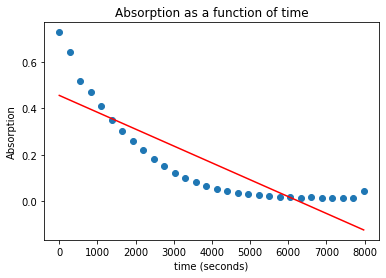

In [19]:
time_data = dataframe1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
abs_data = dataframe1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

abs_line = LinearRegression()  # create object for the class
abs_line.fit(time_data, abs_data)  # perform linear regression
abs_pred = abs_line.predict(time_data)  # make predictions of Absorption given time
# these are matplotlib plotting commands
plt.scatter(time_data, abs_data)
plt.plot(time_data, abs_pred, color='red')
plt.xlabel('time (seconds)')
plt.ylabel('Absorption')
plt.title("Absorption as a function of time")
plt.show()

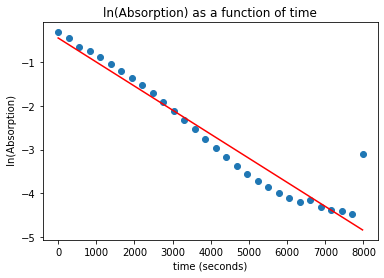

In [20]:
#time_data = dataframe1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
ln_abs_data = dataframe1.iloc[:, 2].values.reshape(-1, 1)
ln_abs_linear_regressor = LinearRegression()  # create object for the class
ln_abs_linear_regressor.fit(time_data, ln_abs_data)  # perform linear regression
ln_abs_pred = ln_abs_linear_regressor.predict(time_data)  # make predictions
plt.scatter(time_data, ln_abs_data)
plt.plot(time_data, ln_abs_pred, color='red')
plt.xlabel('time (seconds)')
plt.ylabel(' ln(Absorption)')
plt.title("ln(Absorption) as a function of time")
plt.show()

Now you type in the code to plot 1/Absorption vs time, along with its best fit line